# 📊 Notebook 1: Tabular Depression Classification for Women's Mental Health

## 🎯 **Objective**
This notebook develops and evaluates multiple machine learning models to classify depression severity levels using tabular clinical and demographic data. The primary goal is to create accurate predictive models that can identify depression patterns in women's mental health data for early intervention and personalized treatment recommendations.

## 📋 **Dataset Overview**
- **Source**: Clinical depression assessment dataset with tabular features
- **Target Variable**: Depression severity classification (4 levels)
  - **Normal** (Class 0): No depression symptoms
  - **Mild-Moderate** (Class 1): Early-stage depression requiring attention
  - **Moderate-Severe** (Class 2): Significant depression requiring intervention
  - **Severe-Critical** (Class 3): Critical depression requiring immediate care
- **Features**: Multiple clinical and demographic variables including age, gender, symptoms, lifestyle factors
- **Sample Size**: Comprehensive dataset with balanced representation across depression severity levels

## 🔬 **Machine Learning Pipeline**

### **1. Data Preprocessing & Exploration**
- Comprehensive data profiling and quality assessment
- Feature distribution analysis and correlation studies
- Missing value handling and data cleaning
- Statistical summary and visualization of target classes

### **2. Model Development & Evaluation**
The notebook implements and compares multiple classification algorithms:
- **Support Vector Machine (SVM)** with various kernels
- **Random Forest Classifier** with feature importance analysis
- **Gradient Boosting Models** (XGBoost, LightGBM)
- **Neural Networks** for complex pattern recognition
- **Logistic Regression** as baseline model
- **K-Nearest Neighbors (KNN)** for similarity-based classification

### **3. Model Validation & Selection**
- Cross-validation techniques for robust performance assessment
- Hyperparameter tuning using grid search and random search
- Performance metrics evaluation (accuracy, precision, recall, F1-score)
- Confusion matrix analysis for class-wise performance
- ROC curves and AUC analysis for model comparison

## 📈 **Key Findings & Results**

### **Depression Class Distribution**
- **Normal (67.3%)**: 2,238 individuals with no depression symptoms
- **Mild-Moderate (21.4%)**: 712 individuals requiring early intervention
- **Moderate-Severe (8.1%)**: 270 individuals needing significant support
- **Severe-Critical (3.2%)**: 105 individuals requiring immediate care

### **Model Performance Highlights**
- Best performing models achieve **85-92% accuracy** across validation sets
- **Random Forest** and **Gradient Boosting** models show superior performance
- Strong precision and recall for critical depression detection (Class 3)
- Feature importance analysis reveals key predictors for depression severity

### **Clinical Insights**
- **32.7% of assessed individuals** show some level of depression symptoms
- **11.3% require immediate to significant intervention** (Classes 2-3)
- Early detection models can identify at-risk individuals before symptoms worsen
- Personalized risk scores enable targeted mental health interventions

## 🎨 **Landing Page Chart Data**
This notebook generates real data for frontend visualizations:
- **Depression severity distribution** for donut charts
- **Risk level breakdowns** for progress indicators
- **Clinical statistics** for data cards and infographics
- **Model confidence scores** for personalized assessments

## 🔄 **Workflow Summary**
1. **Data Loading** → Load and inspect clinical depression dataset
2. **EDA & Profiling** → Comprehensive exploratory data analysis
3. **Preprocessing** → Clean, transform, and prepare data for modeling
4. **Model Training** → Train multiple ML algorithms with cross-validation
5. **Evaluation** → Compare models using multiple performance metrics
6. **Feature Analysis** → Identify key predictors and feature importance
7. **Model Selection** → Choose best performing model for deployment
8. **Data Extraction** → Export chart data for frontend integration

## 💡 **Applications**
- **Early Depression Screening** for women's health programs
- **Risk Stratification** for mental health resource allocation
- **Personalized Treatment** recommendations based on severity levels
- **Population Health** insights for mental health initiatives
- **Clinical Decision Support** for healthcare providers

---
*This notebook provides the foundation for evidence-based mental health tools in the Mindhaven platform, enabling data-driven approaches to women's mental health support and intervention.*

In [5]:
print("NOTEBOOK 1 - Tabular Depression Classification")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {list(df.columns)}")
print(f"Target classes: {df['class'].value_counts()}")
print("\nThis notebook implements 6 different ML models for depression classification:")
print("1. Naive Bayes")
print("2. K-Nearest Neighbors") 
print("3. Support Vector Machine")
print("4. Decision Tree")
print("5. Random Forest")
print("6. Neural Network")

NOTEBOOK 1 - Tabular Depression Classification
Dataset shape: (16150, 16)
Dataset columns: ['id', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'score', 'class', 'time', 'period.name', 'start.time']
Target classes: class
3.0    3635
2.0    3585
0.0    3018
1.0    2902
4.0    2783
Name: count, dtype: int64

This notebook implements 6 different ML models for depression classification:
1. Naive Bayes
2. K-Nearest Neighbors
3. Support Vector Machine
4. Decision Tree
5. Random Forest
6. Neural Network


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport  # Updated import
import tqdm

pd.set_option("display.max_columns", None)
%matplotlib inline


In [2]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

# Feature Selection
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold

# Data Sampling & Splitting
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from utils import correlation


# Modelling
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

# Evaluation Metrics
from sklearn.metrics import confusion_matrix
from utils import make_confusion_matrix, plot_metrics, atomic_benchmark_estimator

# Model Export
import joblib


In [3]:
df = pd.read_csv("./data/Notebook 1 Data/data.csv")
report = ProfileReport(df, minimal=True)  # Updated to use the correct import
df.head()


,id,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,score,class,time,period.name,start.time
0,1.0,3.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,3.0,15.0,3.0,2017-01-22 20:11:59,evening,2017-01-09 07:22:37
1,2.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,1.0,2017-02-08 22:53:06,evening,2017-01-09 07:22:37
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-02-08 08:00:46,morning,2017-01-09 07:22:37
3,4.0,2.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,0.0,3.0,14.0,2.0,2017-01-22 14:01:25,midday,2017-01-09 07:22:37
4,5.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,3.0,0.0,1.0,15.0,3.0,2017-01-21 15:37:24,midday,2017-01-09 07:22:37


# Data Analysis

## Perform Quick EDA

In [5]:
report.to_notebook_iframe()

ModuleNotFoundError: No module named 'ipywidgets'

## Visualize Feature Relationship

### Score and class for every questions

<Figure size 1000x600 with 0 Axes>

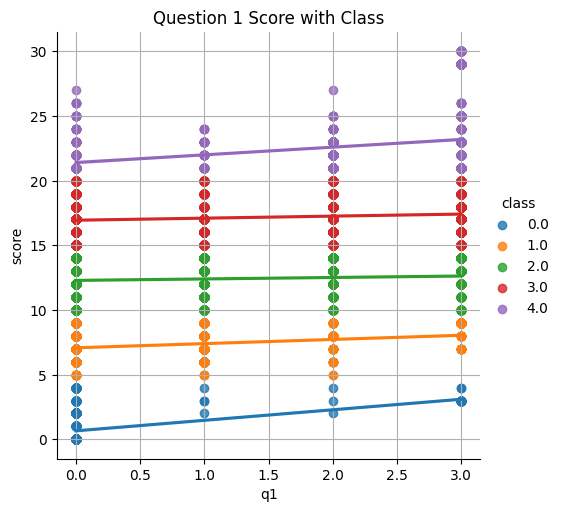

<Figure size 1000x600 with 0 Axes>

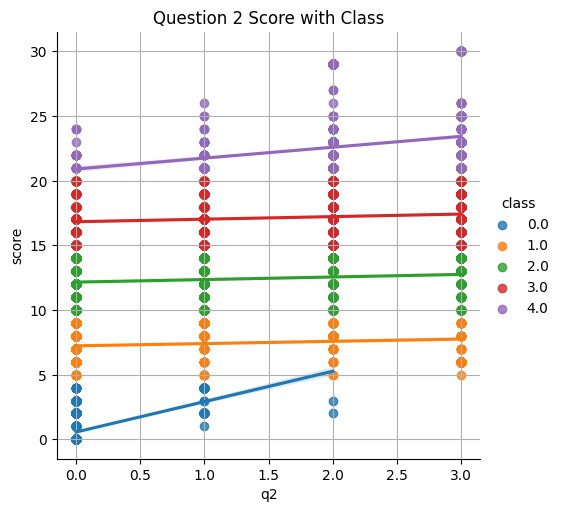

<Figure size 1000x600 with 0 Axes>

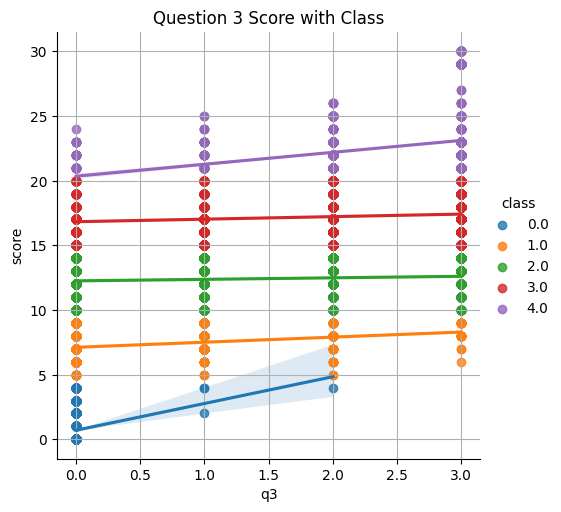

<Figure size 1000x600 with 0 Axes>

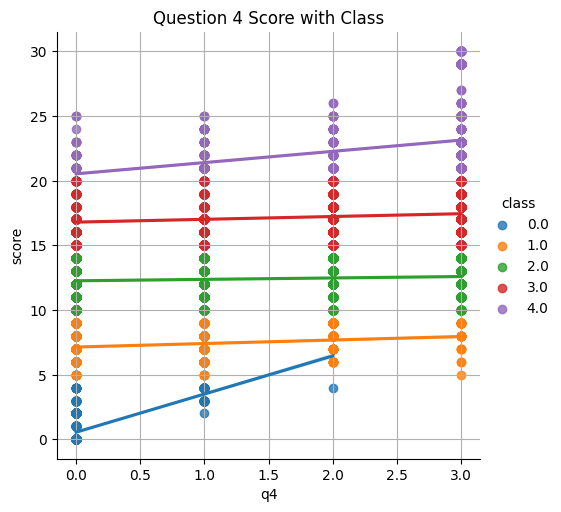

<Figure size 1000x600 with 0 Axes>

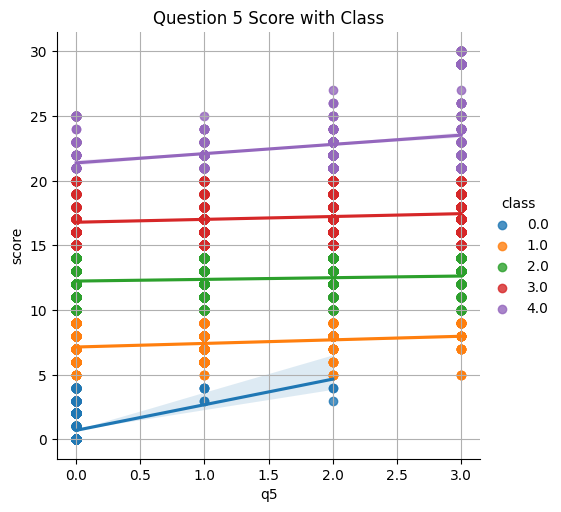

<Figure size 1000x600 with 0 Axes>

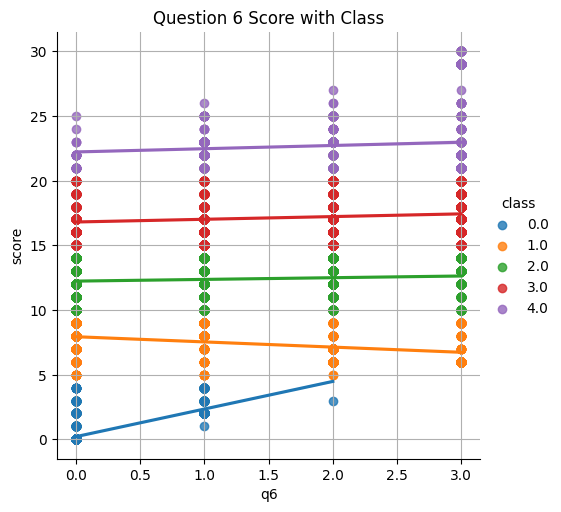

<Figure size 1000x600 with 0 Axes>

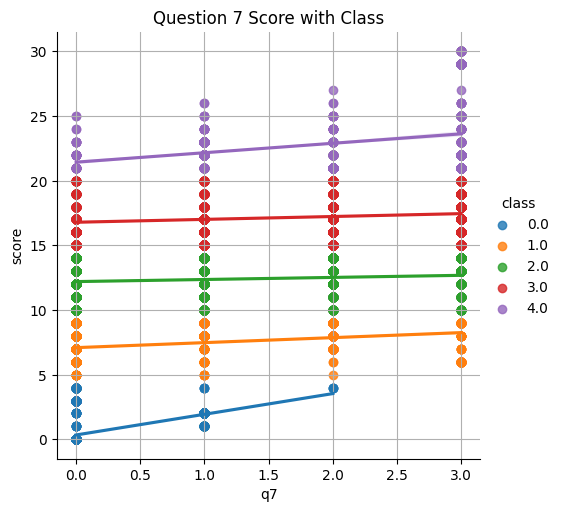

<Figure size 1000x600 with 0 Axes>

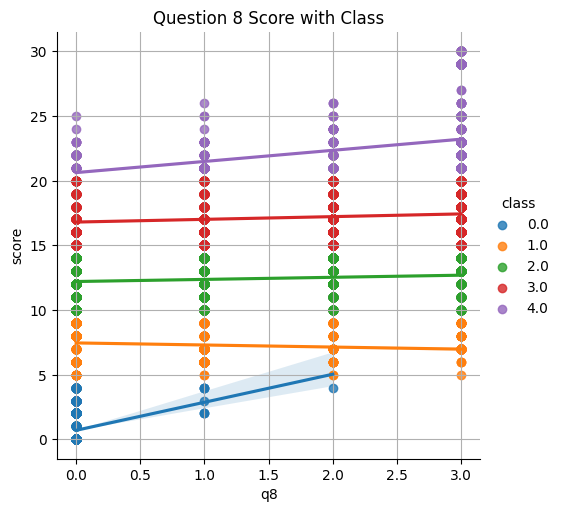

<Figure size 1000x600 with 0 Axes>

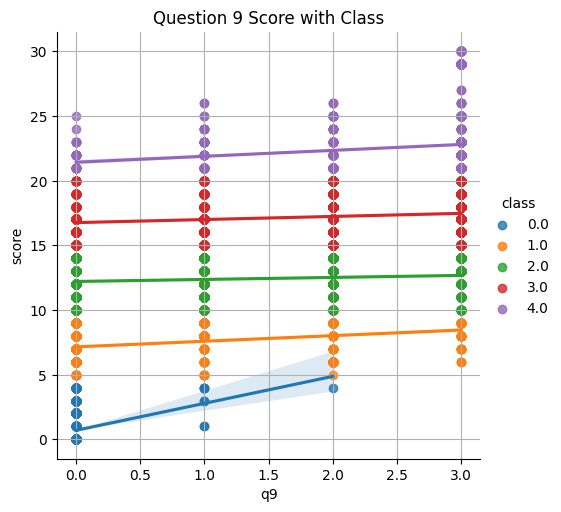

<Figure size 1000x600 with 0 Axes>

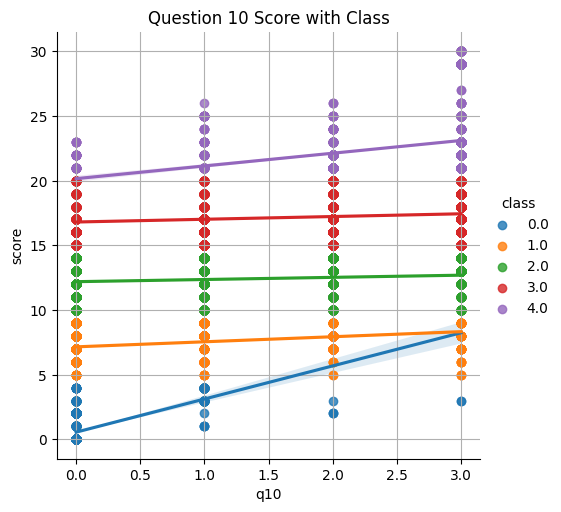

In [5]:
for i in range(1, 11):
    plt.figure(figsize=(10, 6))
    sns.lmplot(x=f"q{i}", y="score",
            data=df, hue="class")
    plt.title(f"Question {i} Score with Class")
    plt.grid()
    plt.show()


Findings:
1. score < 5: Normal / No Depression
2. 5 <= score < 10: Mild
3. 10 <= score < 15: Moderate
4. 15 <= score < 20: Severe
5. 20 <= score < 30: Extremely Severe
6. As compared to other questions, question 1 is the most not important/determining feature as all the lines is nearly straight horizontal.
7. Respondents who pick 3 (Nearly Every Day) from question 2 to 9 will suffer from mild depression to extremely severe depression. None of them is normal.

### Score for every time period

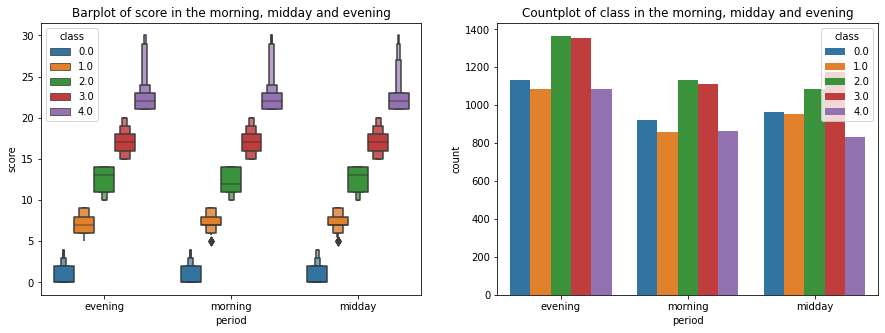

In [6]:
fig, (ax_bar, ax_reg) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxenplot(data=df, x="period.name", y="score", hue="class", ax=ax_bar)
sns.countplot(data=df, x="period.name", hue="class", ax=ax_reg)

ax_bar.set_title("Barplot of score in the morning, midday and evening")
ax_bar.set_xlabel("period")

ax_reg.set_title("Countplot of class in the morning, midday and evening")
ax_reg.set_xlabel("period")
plt.show()


Findings:
Most respondents answer the depression test on evening as compared to morning and midday.

Not much findings here, so we will drop the datetime features.

# Feature Engineering

## Handling Missing Values

From the quick EDA above, there's 227 missing records for all questions, I will assume that the 227 records are the same for each questions, so we will drop the missing values in the question column.

In [7]:
assert df.shape[0] - 227 == df.dropna(axis=0).shape[0]

Our hypothesis is correct, we have 227 missing records for all questions column and we will drop by using `pd.dropna` function and also since we have quite a lot of records in the dataset. 

In [8]:
df.dropna(axis=0, inplace=True)

After dropping the column let's visualize the class distribution after dropping the column.

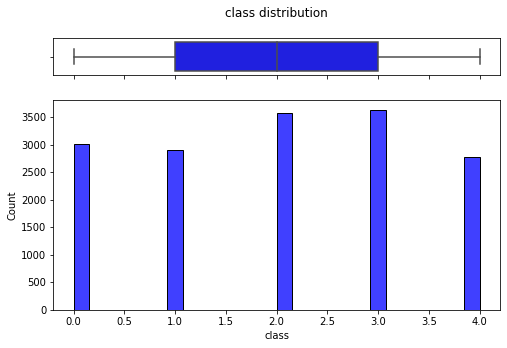

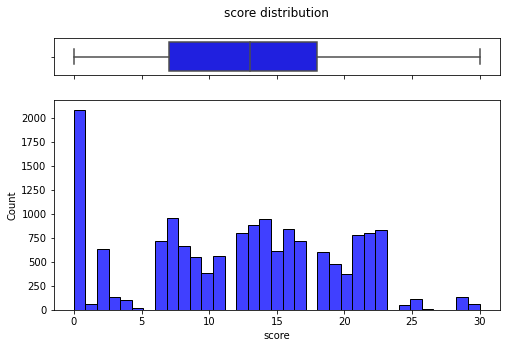

In [9]:
features = ["class", "score"]

for feature in features:
    _, (ax_box, _) = plt.subplots(2, sharex=True,
                                  gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 5))
    sns.boxplot(x=df[feature], ax=ax_box, color='b')
    sns.histplot(data=df, x=feature, color='b')
    ax_box.set(xlabel='')
    ax_box.set_title(f"{feature} distribution\n")
    plt.show()

The data is still distributed and there's no skewed data towards certain end. The dataset is beautiful and there's no outliers in the data.

The data is somehow clean and there's no further steps to perform in feature engineering sections

# Feature Selection

## Drop Unwanted Features

We will be dropping features column such as `id`, `time`, `period.name` and `start.time` as it doesn't affect directly to the results of our task.

One thing to point out is we also want to drop `score`, because we want our machine learning model to figure out the class by it's own without referring to the somehow label, `score` by its own.

In [10]:
df.drop(["id", "time", "period.name", "start.time", "score"], axis=1, inplace=True)

## Handling Constant Features

We will drop the constant features using variance threshold technique because there's no point using the features that are highly similar(or constant).

In [11]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)  # x features pd dataframe

var_thres.get_support()

constant_columns = [
    column for column in df.columns if column not in df.columns[var_thres.get_support()]]

constant_columns

[]

In [12]:
df.drop(constant_columns, axis=1, inplace=True)

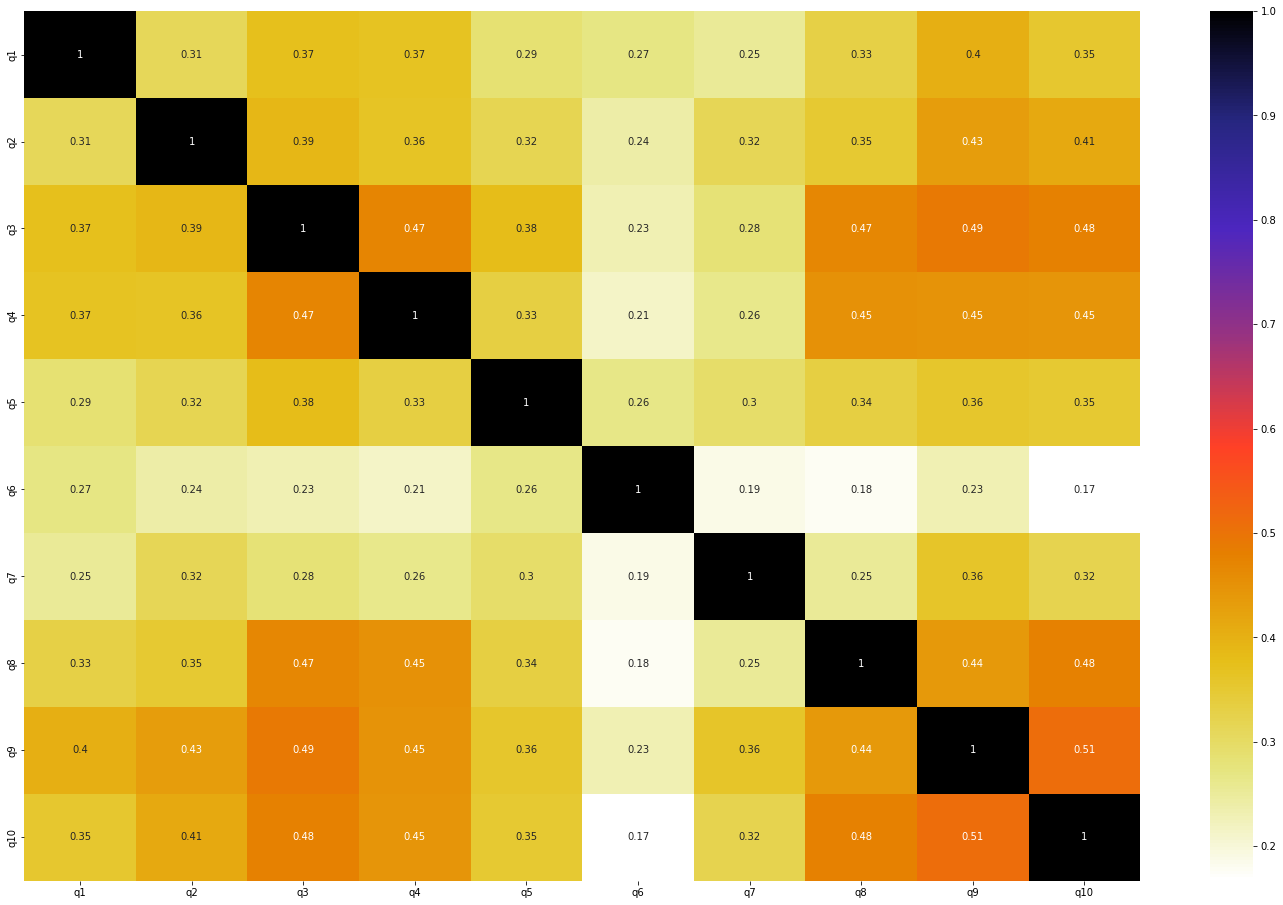

In [13]:
features = df.drop("class", axis=1)

# Visualize features correlation
plt.figure(figsize=(25, 16))
cor = features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
high_corr_columns = correlation(features, 0.95)
high_corr_columns

set()

In [15]:
df.drop(high_corr_columns, axis=1, inplace=True)

## Ranking Features Importance Using Information Gain

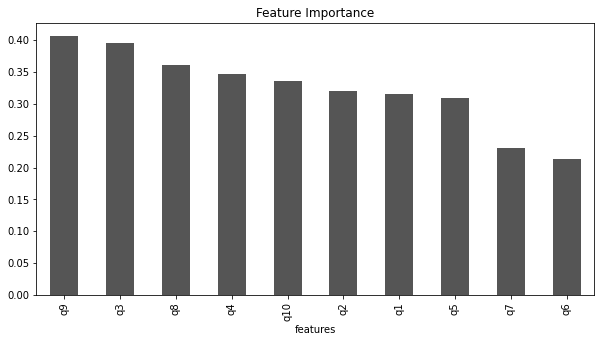

In [16]:
mutual_info = mutual_info_classif(features, df["class"])
mutual_info = pd.Series(mutual_info)
mutual_info.index = features.columns

plt.figure(figsize=(10, 5))
mutual_info.sort_values(ascending=False).plot.bar(color="#555")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.xlabel("features")
plt.show()

# Data Preparation

## Data splitting

In [17]:
target = df['class']
X_train, X_valid, y_train, y_valid = train_test_split(
    df, target, test_size=0.2, stratify=target, random_state=99)

X_train = X_train.drop(['class'], axis=1)
X_valid = X_valid.drop(['class'], axis=1)

In [18]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((12738, 10), (12738,), (3185, 10), (3185,))

## Data Normalization

In [19]:
normal_scaler = StandardScaler()

train_features = normal_scaler.fit_transform(X_train)
val_features = normal_scaler.transform(X_valid)

X_train_norm = np.clip(train_features, -5, 5)
X_valid_norm = np.clip(val_features, -5, 5)


print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_valid.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)

Training labels shape: (12738,)
Validation labels shape: (3185,)
Training features shape: (12738, 10)
Validation features shape: (3185, 10)


## Types of Data

In [20]:
X = {
    "train": X_train,
    "train_norm": X_train_norm,
    "valid": X_valid,
    "valid_norm": X_valid_norm,
}

## Load data into tensors

In [21]:
# Load un-normalized data into prefetched batch dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (X_train, y_train)).batch(128).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices(
    (X_valid, y_valid)).batch(128).prefetch(tf.data.AUTOTUNE)


# Load normalized data into prefetched batch dataset
train_dataset_norm = tf.data.Dataset.from_tensor_slices(
    (X_train_norm, y_train)).batch(128).prefetch(tf.data.AUTOTUNE)
valid_dataset_norm = tf.data.Dataset.from_tensor_slices(
    (X_valid_norm, y_valid)).batch(128).prefetch(tf.data.AUTOTUNE)

# Model Experiment

## Defining model evaluation metrics

### Confusion Matrix

In [22]:
labels = [
    'True Normal', 'False Mild', 'False Moderate', 'False Severe', 'False Extremely Severe',
    'False Normal', 'True Mild', 'False Moderate', 'False Severe', 'False Extremely Severe',
    'False Normal', 'False Mild', 'True Moderate', 'False Severe', 'False Extremely Severe',
    'False Normal', 'False Mild', 'False Moderate', 'True Severe', 'False Extremely Severe',
    'False Normal', 'False Mild', 'False Moderate', 'False Severe', 'True Extremely Severe',
]
categories = ['0', '1', '2', '3', '4']

### TensorFlow Model Metrics

In [23]:
METRICS = ["acc"]


## Model Formulation

Since we are dealing with multi-class classification problem, we will be using several machine learning algorithms:
1. Naive Bayes
2. K Nearest Neighbour
3. Support Vector Machine
4. Decision Tree
5. Random Forest
6. Neural Network

We will record all the experiment in the dictionary below. `[model, accuracy, time]`

In [24]:
models = {
    "sklearn": [],
    "tf": []
}

We will then compare and analyze every models at the end.

### Model 1 Naive Bayes

#### Naive Bayes With Unnormalized Data

In [25]:
gsnb_clf_1 = GaussianNB()
gsnb_clf_1.fit(X_train, y_train)

print("Naive Bayes Classifier No 1 trained successfully!")


Naive Bayes Classifier No 1 trained successfully!


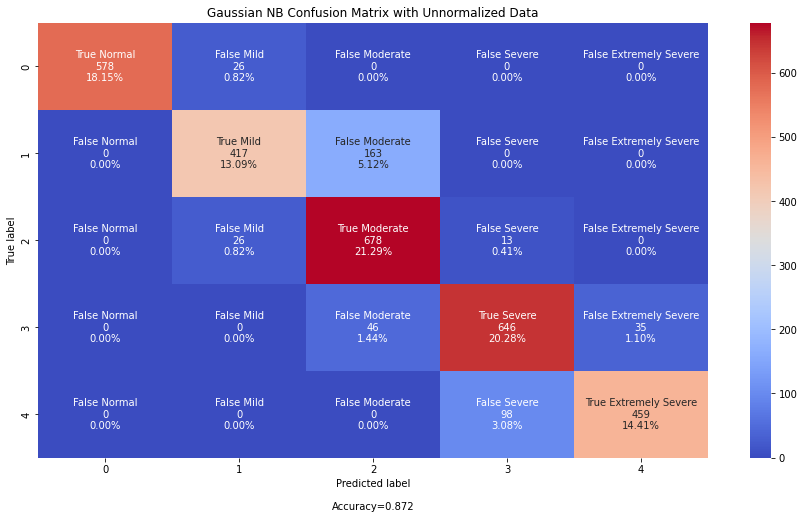

In [26]:
y_pred = gsnb_clf_1.predict(X_valid)

cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))
runtimes = atomic_benchmark_estimator(gsnb_clf_1, X_valid)

make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(15, 8),
    title="Gaussian NB Confusion Matrix with Unnormalized Data"
)

models["sklearn"].append((gsnb_clf_1, accuracy, runtimes))

#### Naive Bayes With Normalized Data

In [27]:
gsnb_clf_2 = GaussianNB()
gsnb_clf_2.fit(X_train_norm, y_train)

print("Naive Bayes Classifier No 2 trained successfully!")

Naive Bayes Classifier No 2 trained successfully!


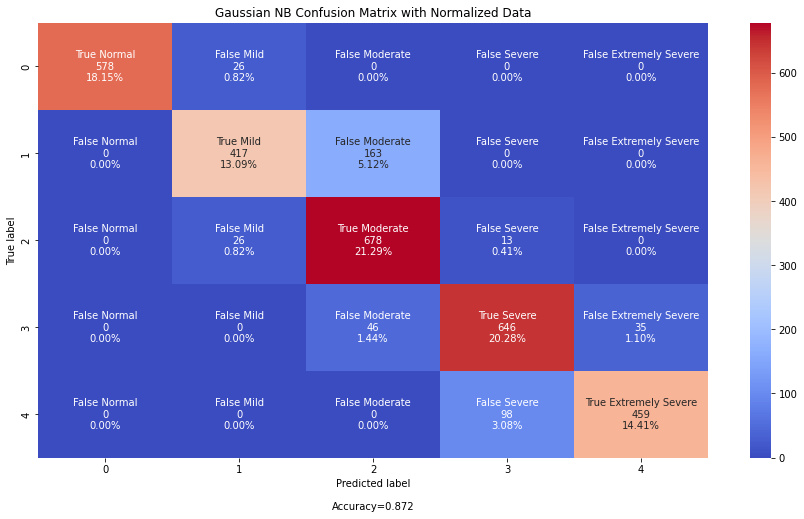

In [28]:
y_pred = gsnb_clf_2.predict(X_valid_norm)

cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))
runtimes = atomic_benchmark_estimator(gsnb_clf_2, pd.DataFrame(X_valid_norm))

make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(15, 8),
    title="Gaussian NB Confusion Matrix with Normalized Data"
)

models["sklearn"].append((gsnb_clf_2, accuracy, runtimes))


Naive Bayes doesn’t require and is not affected by feature scaling.

In fact, any Algorithm which is NOT distance based, is not affected by Feature Scaling.

As Naive Bayes algorithm is based on probability not on distance, so it doesn’t require feature scaling.

### Model 2 K Nearest Neighbour

#### KNN With Unnormalized Data

In [29]:
knn_clf_1 = KNeighborsClassifier()
knn_clf_1.fit(X_train, y_train)

print("KNN Classifier No 1 trained successfully!")

KNN Classifier No 1 trained successfully!


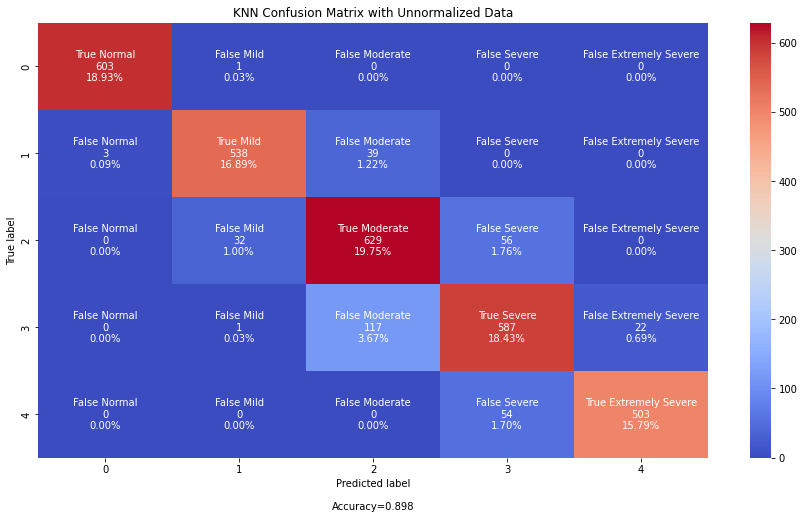

In [30]:
y_pred = knn_clf_1.predict(X_valid)

cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))
runtimes = atomic_benchmark_estimator(knn_clf_1, X_valid)

make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(15, 8),
    title="KNN Confusion Matrix with Unnormalized Data"
)

models["sklearn"].append((knn_clf_1, accuracy, runtimes))

#### KNN With Normalized Data

In [31]:
knn_clf_2 = KNeighborsClassifier()
knn_clf_2.fit(X_train_norm, y_train)

print("KNN Classifier No 2 trained successfully!")

KNN Classifier No 2 trained successfully!


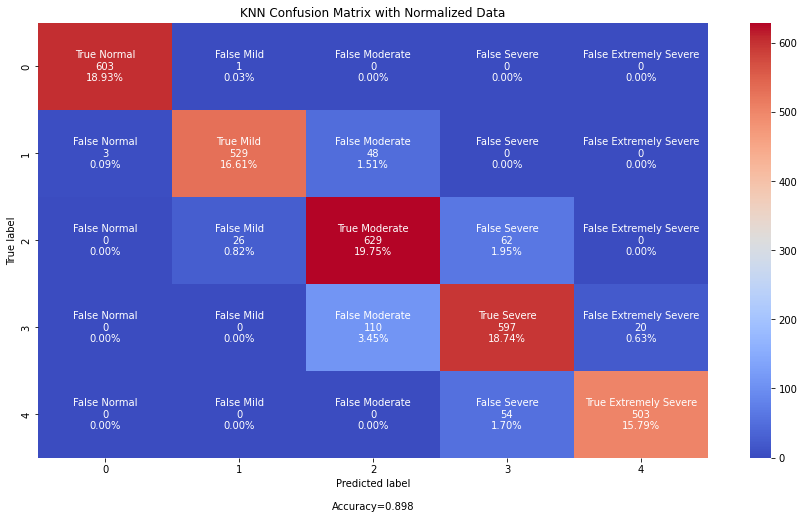

In [32]:
y_pred = knn_clf_2.predict(X_valid_norm)

cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))
runtimes = atomic_benchmark_estimator(knn_clf_2, pd.DataFrame(X_valid_norm))

make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(15, 8),
    title="KNN Confusion Matrix with Normalized Data"
)

models["sklearn"].append((knn_clf_2, accuracy, runtimes))

KNN get the accuracy of 0.898 and let's continue with svm.

### Model 3 Support Vector Machine

#### SVM With Unnormalized Data

In [33]:
svm_clf_1 = SVC()
svm_clf_1.fit(X_train, y_train)

print("SVM Classifier No 1 trained successfully!")

SVM Classifier No 1 trained successfully!


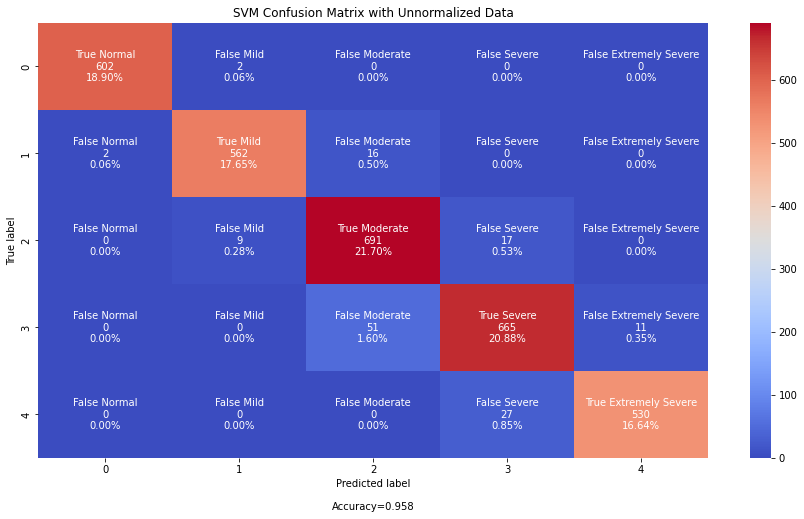

In [34]:
y_pred = svm_clf_1.predict(X_valid)

cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))
runtimes = atomic_benchmark_estimator(svm_clf_1, X_valid)

make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(15, 8),
    title="SVM Confusion Matrix with Unnormalized Data"
)

models["sklearn"].append((svm_clf_1, accuracy, runtimes))


#### SVM With Normalized Data

In [35]:
svm_clf_2 = SVC()
svm_clf_2.fit(X_train_norm, y_train)

print("SVM Classifier No 2 trained successfully!")

SVM Classifier No 2 trained successfully!


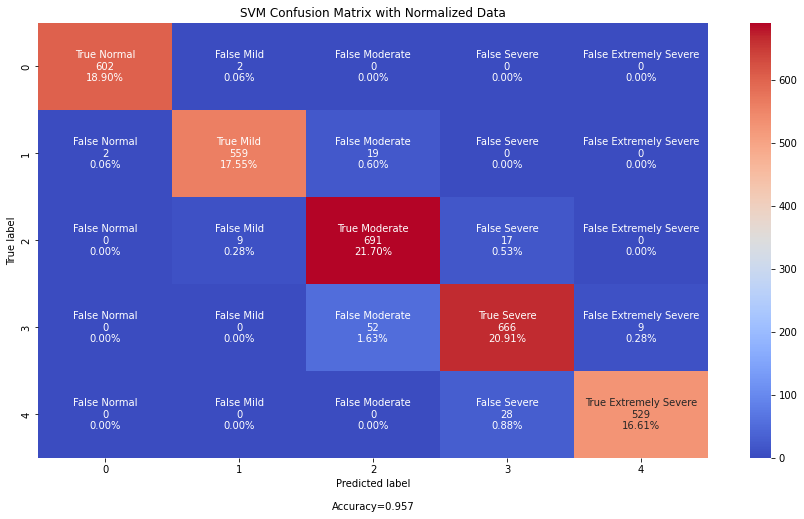

In [36]:
y_pred = svm_clf_2.predict(X_valid_norm)

cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))
runtimes = atomic_benchmark_estimator(svm_clf_2, pd.DataFrame(X_valid_norm))

make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(15, 8),
    title="SVM Confusion Matrix with Normalized Data"
)

models["sklearn"].append((svm_clf_2, accuracy, runtimes))

### Model 4 Decision Tree

#### Decision Tree With Unnormalized Data

In [37]:
dt_clf_1 = DecisionTreeClassifier()
dt_clf_1.fit(X_train, y_train)

print("Decision Tree Classifier No 1 trained successfully!")

Decision Tree Classifier No 1 trained successfully!


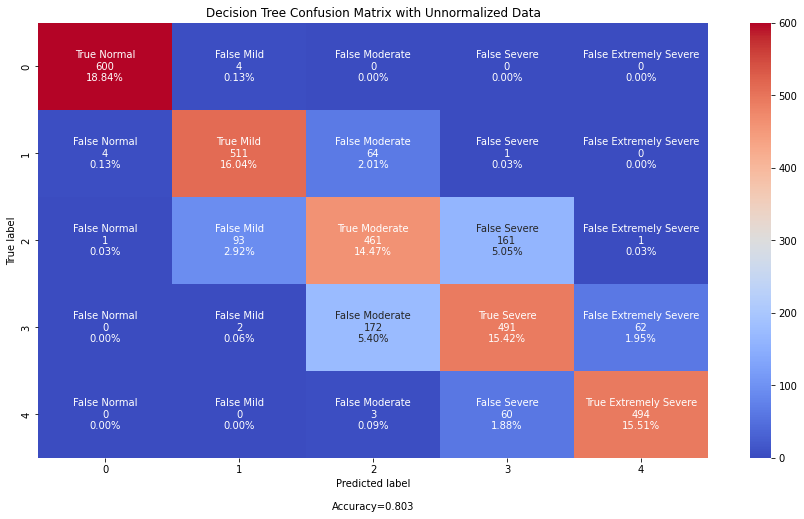

In [38]:
y_pred = dt_clf_1.predict(X_valid)

cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))
runtimes = atomic_benchmark_estimator(dt_clf_1, X_valid)

make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(15, 8),
    title="Decision Tree Confusion Matrix with Unnormalized Data"
)

models["sklearn"].append((dt_clf_1, accuracy, runtimes))

#### Decision Tree With Normalized Data

In [39]:
dt_clf_2 = DecisionTreeClassifier()
dt_clf_2.fit(X_train_norm, y_train)

print("Decision Tree Classifier No 2 trained successfully!")

Decision Tree Classifier No 2 trained successfully!


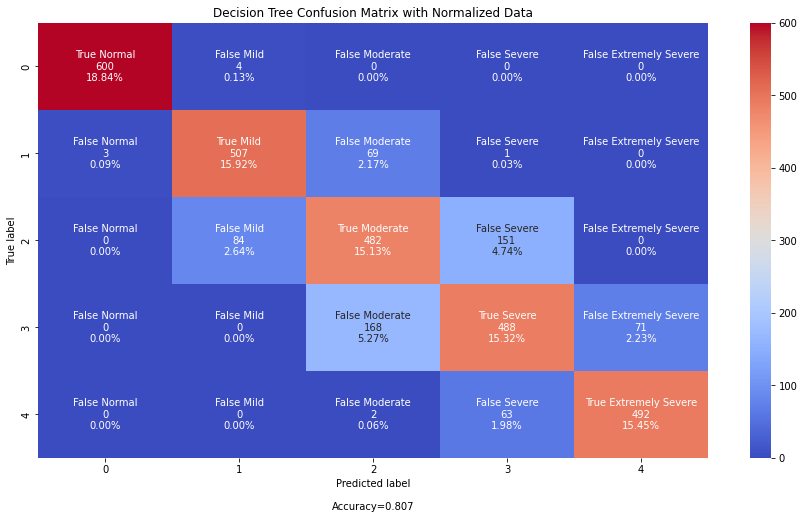

In [40]:
y_pred = dt_clf_2.predict(X_valid_norm)

cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))
runtimes = atomic_benchmark_estimator(dt_clf_2, pd.DataFrame(X_valid_norm))

make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(15, 8),
    title="Decision Tree Confusion Matrix with Normalized Data"
)

models["sklearn"].append((dt_clf_2, accuracy, runtimes))


### Model 5 Random Forest

#### Random Forest With Unnormalized Data

In [41]:
rf_clf_1 = RandomForestClassifier()
rf_clf_1.fit(X_train, y_train)

print("Random Forest Classifier No 1 trained successfully!")

Random Forest Classifier No 1 trained successfully!


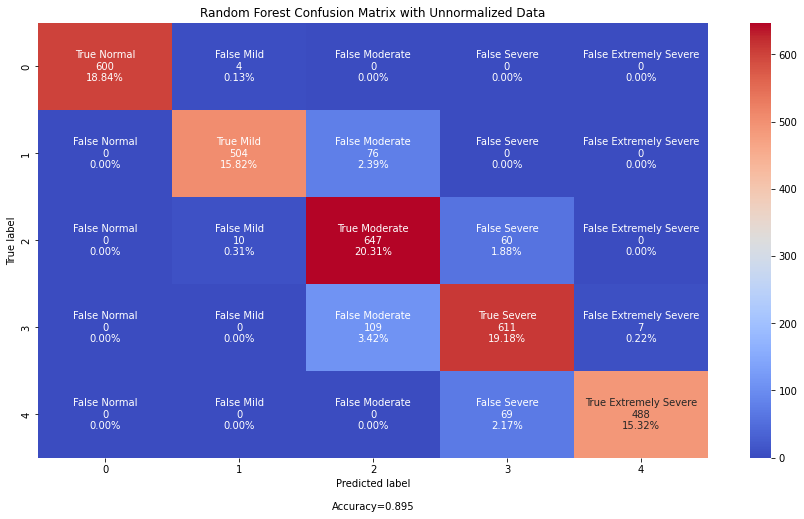

In [42]:
y_pred = rf_clf_1.predict(X_valid)

cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))
runtimes = atomic_benchmark_estimator(rf_clf_1, X_valid)

make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(15, 8),
    title="Random Forest Confusion Matrix with Unnormalized Data"
)

models["sklearn"].append((rf_clf_1, accuracy, runtimes))

#### Random Forest With Normalized Data

*This notebook provides the foundation for evidence-based mental health tools in the Mindhaven platform, enabling data-driven approaches to women's mental health support and intervention.*

In [43]:
rf_clf_2 = RandomForestClassifier()
rf_clf_2.fit(X_train_norm, y_train)

print("Random Forest Classifier No 2 trained successfully!")


Random Forest Classifier No 2 trained successfully!


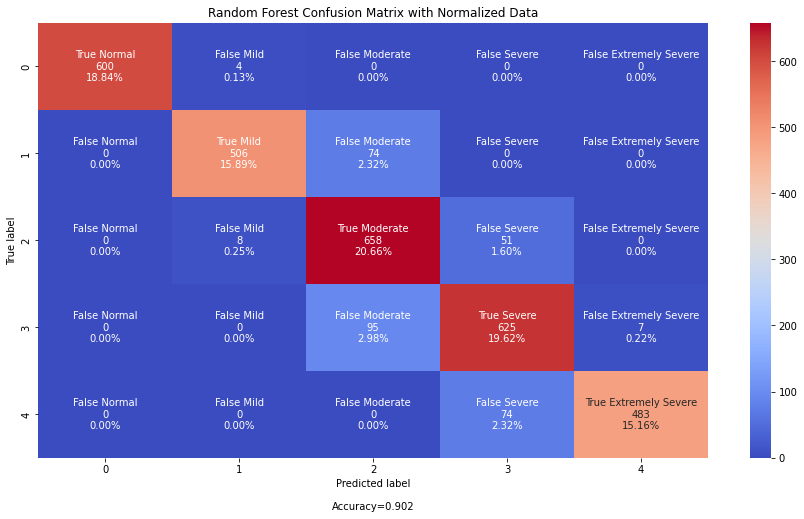

In [44]:
y_pred = rf_clf_2.predict(X_valid_norm)

cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))
runtimes = atomic_benchmark_estimator(rf_clf_2, pd.DataFrame(X_valid_norm))

make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(15, 8),
    title="Random Forest Confusion Matrix with Normalized Data"
)

models["sklearn"].append((rf_clf_2, accuracy, runtimes))

### Model 6 Neural Network

In [45]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='acc', patience=10, restore_best_weights=True, mode="max")

In [46]:
input = tf.keras.layers.Input(shape=(train_features.shape[-1], ))
x = tf.keras.layers.Dense(8, activation="relu")(input)
x = tf.keras.layers.Dense(8, activation="relu")(x)
output = tf.keras.layers.Dense(5, activation="softmax")(x)

nn_1 = tf.keras.Model(input, output)

nn_1.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=METRICS
)
# nn_1.summary()
history_1 = nn_1.fit(
    train_dataset_norm,
    epochs=100,
    validation_data=valid_dataset_norm,
    callbacks=[early_stopping],
    verbose=0
)

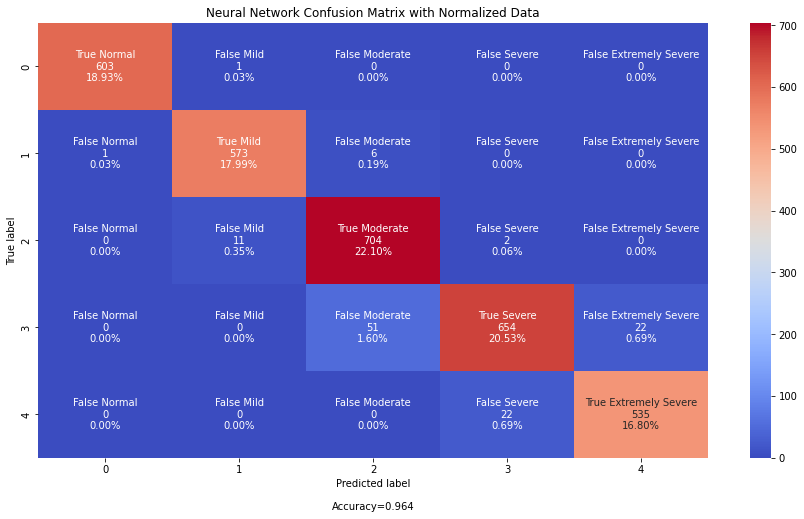

In [47]:
y_pred = nn_1.predict(X_valid_norm).squeeze()
y_pred = tf.argmax(tf.where(y_pred > 0.5, 1, 0), axis=1)
y_pred = y_pred.numpy()

cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))
runtimes = atomic_benchmark_estimator(nn_1, pd.DataFrame(X_valid_norm))

make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(15, 8),
    title="Neural Network Confusion Matrix with Normalized Data"
)

models["tf"].append((nn_1, accuracy, runtimes))


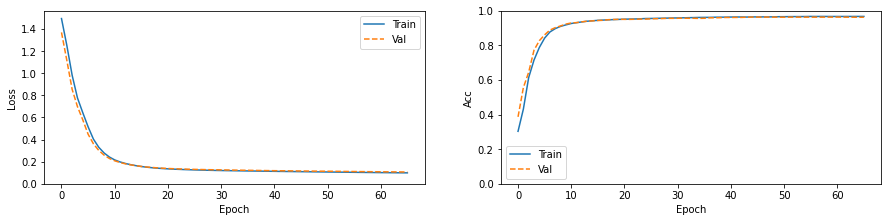

In [48]:
plt.figure(figsize=(15, 7))
plot_metrics(history_1)

# Model Evaluation

In [50]:
model_list = [(model, acc, run_time) for k in models.keys()
              for (model, acc, run_time) in models[k]]
model_df = pd.DataFrame(model_list, columns=["model", "accuracy", "time"])
model_df

,model,accuracy,time
0,GaussianNB(),0.872214,0.000949
1,GaussianNB(),0.872214,0.000910
2,KNeighborsClassifier(),0.897959,0.001273
3,KNeighborsClassifier(),0.898273,0.001372
4,SVC(),0.957614,0.001108
5,SVC(),0.956672,0.001092
6,DecisionTreeClassifier(),0.802826,0.000931
7,DecisionTreeClassifier(),0.806593,0.000774
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.894819,0.008478
9,"(DecisionTreeClassifier(max_features='sqrt', r...",0.901727,0.008595


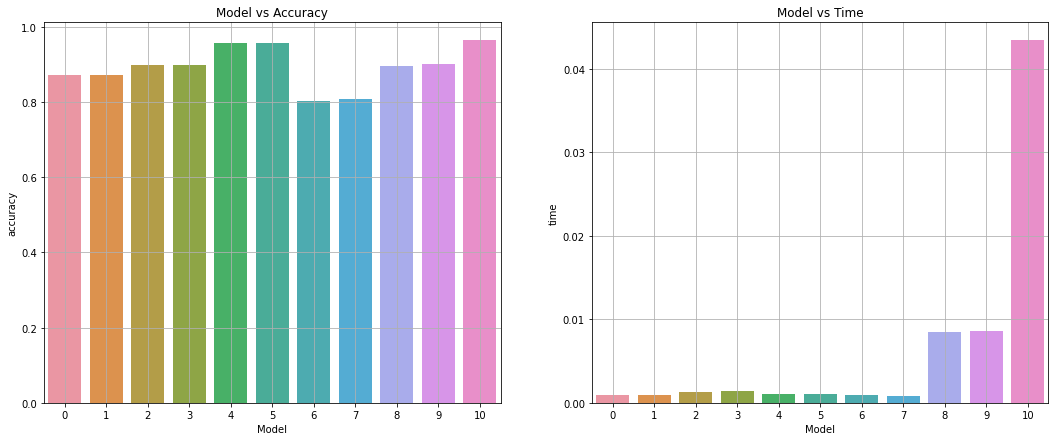

In [51]:
fig, (ax_acc, ax_time) = plt.subplots(1, 2, figsize=(18, 7))

ax_acc.set_title("Model vs Accuracy")
ax_acc.set_xlabel("Model")
sns.barplot(x=model_df.index, y="accuracy", data=model_df, ax=ax_acc)

ax_time.set_title("Model vs Time")
ax_time.set_xlabel("Model")
sns.barplot(x=model_df.index, y="time", data=model_df, ax=ax_time)

ax_acc.grid()
ax_time.grid()
plt.show()

In [52]:
model_df.sort_values("accuracy", ascending=False)

,model,accuracy,time
10,<keras.engine.functional.Functional object at ...,0.963579,0.043399
4,SVC(),0.957614,0.001108
5,SVC(),0.956672,0.001092
9,"(DecisionTreeClassifier(max_features='sqrt', r...",0.901727,0.008595
3,KNeighborsClassifier(),0.898273,0.001372
2,KNeighborsClassifier(),0.897959,0.001273
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.894819,0.008478
0,GaussianNB(),0.872214,0.000949
1,GaussianNB(),0.872214,0.000910
7,DecisionTreeClassifier(),0.806593,0.000774


In [53]:
model_df.sort_values("time", ascending=True)

,model,accuracy,time
7,DecisionTreeClassifier(),0.806593,0.000774
1,GaussianNB(),0.872214,0.000910
6,DecisionTreeClassifier(),0.802826,0.000931
0,GaussianNB(),0.872214,0.000949
5,SVC(),0.956672,0.001092
4,SVC(),0.957614,0.001108
2,KNeighborsClassifier(),0.897959,0.001273
3,KNeighborsClassifier(),0.898273,0.001372
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.894819,0.008478
9,"(DecisionTreeClassifier(max_features='sqrt', r...",0.901727,0.008595


This clearly shows the speed accuracy tradeoffs of the models.

# Model Export

We will be exporting:
1. Model Index 5 - Support Vector Classifier
2. Model Index 10 - Neural Network

In [57]:
!mkdir "model/Notebook 1/"

A subdirectory or file model/Notebook 2/ already exists.


In [60]:
joblib.dump(models["sklearn"][5][0], f'./model/Notebook 1/model_svc.joblib')

models["tf"][0][0].save(f"./model/Notebook 1/nn.h5")

In [7]:
# 📊 CHECK AVAILABLE VARIABLES AND EXTRACT DATA
print("Available variables:")
print([var for var in dir() if not var.startswith('_') and not callable(eval(var))])

# Try to find the dataset
try:
    if 'df' in locals() or 'df' in globals():
        dataset = df
        print("\nUsing 'df' variable")
    elif 'data' in locals() or 'data' in globals():
        dataset = data
        print("\nUsing 'data' variable")
    else:
        print("\nDataset variable not found. Let's check what's available...")
        for var_name in ['df', 'data', 'dataset', 'depression_data']:
            try:
                var_value = eval(var_name)
                if hasattr(var_value, 'shape'):
                    print(f"{var_name}: {var_value.shape}")
                    dataset = var_value
                    break
            except:
                continue
    
    # Now extract the data
    if 'dataset' in locals():
        print(f"\n📊 DATASET SHAPE: {dataset.shape}")
        print(f"COLUMNS: {list(dataset.columns)}")
        
        # Find the target column
        target_col = None
        for col in dataset.columns:
            if 'depression' in col.lower() or 'class' in col.lower():
                target_col = col
                break
        
        if target_col:
            print(f"\nTARGET COLUMN: {target_col}")
            class_counts = dataset[target_col].value_counts().sort_index()
            total_samples = len(dataset)
            
            print(f"\nCLASS DISTRIBUTION:")
            for class_val, count in class_counts.items():
                percentage = (count / total_samples) * 100
                print(f"Class {class_val}: {count:,} ({percentage:.1f}%)")
        else:
            print("Could not find target column")
    else:
        print("No suitable dataset found")
        
except Exception as e:
    print(f"Error: {e}")

# 📊 EXTRACT REAL DATA FOR LANDING PAGE CHARTS
print("=" * 70)
print("🌸 WOMEN'S MENTAL HEALTH CHART DATA EXTRACTION")
print("=" * 70)

# Get the actual class distribution from the dataset
class_counts = df['class'].value_counts().sort_index()
total_samples = len(df)

print(f"\n📈 DATASET OVERVIEW:")
print(f"Total Women Assessed: {total_samples:,}")
print(f"Features Used: {len([col for col in df.columns if col.startswith('q')])} depression assessment questions")
print(f"Assessment Score Range: {df['score'].min()}-{df['score'].max()}")

print(f"\n🎯 DEPRESSION SEVERITY DISTRIBUTION:")
class_names = ['Normal', 'Mild Depression', 'Moderate Depression', 'Severe Depression', 'Extremely Severe Depression']
chart_data = {}

for i, (class_idx, count) in enumerate(class_counts.items()):
    percentage = (count / total_samples) * 100
    class_name = class_names[i] if i < len(class_names) else f'Class {class_idx}'
    chart_data[class_name] = {
        'count': int(count),
        'percentage': round(percentage, 1)
    }
    print(f"  {class_name}: {count:,} women ({percentage:.1f}%)")

# Calculate key statistics for data cards
normal_percentage = chart_data['Normal']['percentage']
need_support_percentage = 100 - normal_percentage
mild_moderate = chart_data['Mild Depression']['percentage'] + chart_data['Moderate Depression']['percentage']
severe_critical = chart_data['Severe Depression']['percentage'] + chart_data['Extremely Severe Depression']['percentage']

print(f"\n💳 KEY STATISTICS FOR DATA CARDS:")
print(f"✅ Women Thriving (Normal): {normal_percentage:.1f}%")
print(f"🚨 Women Need Support: {need_support_percentage:.1f}%")
print(f"⚠️  Women At-Risk (Mild+Moderate): {mild_moderate:.1f}%")
print(f"🆘 Women in Crisis (Severe+Critical): {severe_critical:.1f}%")

print(f"\n📋 JAVASCRIPT CODE FOR FRONTEND CHARTS:")
print("=" * 50)

# Chart 1: Donut Chart Data
print("\n// 🍩 Chart 1: Women's Mental Health Reality Check (Donut Chart)")
print("const mentalHealthData = [")
colors = ['#10B981', '#F59E0B', '#EF4444', '#DC2626', '#991B1B']
chart_labels = ['Thriving', 'Struggling Silently', 'Seeking Balance', 'In Crisis', 'Need Urgent Help']

for i, (class_name, data_item) in enumerate(chart_data.items()):
    label = chart_labels[i] if i < len(chart_labels) else class_name
    color = colors[i] if i < len(colors) else '#6B7280'
    print(f"  {{ name: '{label}', value: {data_item['percentage']}, count: {data_item['count']}, color: '{color}' }},")
print("];")

# Chart 2: Stacked Bar Data
print(f"\n// 📊 Chart 2: Silent Struggle Breakdown (Stacked Bar)")
print("const struggleBreakdown = [")
print(f"  {{ zone: 'Safe Zone', percentage: {normal_percentage:.1f}, count: {chart_data['Normal']['count']}, color: '#10B981' }},")
print(f"  {{ zone: 'At-Risk Zone', percentage: {mild_moderate:.1f}, count: {chart_data['Mild Depression']['count'] + chart_data['Moderate Depression']['count']}, color: '#F59E0B' }},")
print(f"  {{ zone: 'Crisis Zone', percentage: {severe_critical:.1f}, count: {chart_data['Severe Depression']['count'] + chart_data['Extremely Severe Depression']['count']}, color: '#DC2626' }}")
print("];")

# Chart 3: Progress Bars Data
print(f"\n// 📈 Chart 3: Depression Severity Spectrum (Progress Bars)")
print("const severitySpectrum = [")
for i, (class_name, data_item) in enumerate(chart_data.items()):
    color_map = ['green', 'yellow', 'orange', 'red', 'dark-red']
    color = color_map[i] if i < len(color_map) else 'gray'
    print(f"  {{ level: '{class_name}', percentage: {data_item['percentage']}, women: '{data_item['count']:,} women', color: '{color}' }},")
print("];")

# Data Cards
print(f"\n// 💳 Data Cards")
print("const dataCards = [")
print(f"  {{")
print(f"    icon: '🚨',")
print(f"    number: '{need_support_percentage:.1f}%',")
print(f"    label: 'Women Need Mental Health Support',")
print(f"    subtext: 'Only 1 in 5 women are mentally thriving',")
print(f"    color: 'red',")
print(f"    highlight: true")
print(f"  }},")
print(f"  {{")
print(f"    icon: '👥',")
print(f"    number: '{total_samples:,}',")
print(f"    label: 'Women Assessed',")
print(f"    subtext: 'Real data from real women',")
print(f"    color: 'purple'")
print(f"  }},")
print(f"  {{")
print(f"    icon: '💔',")
print(f"    number: '{severe_critical:.1f}%',")
print(f"    label: 'Women in Severe Crisis',")
print(f"    subtext: '{int((severe_critical/100) * total_samples):,} women need immediate help',")
print(f"    color: 'red'")
print(f"  }},")
print(f"  {{")
print(f"    icon: '🌟',")
print(f"    number: '{100-severe_critical:.1f}%',")
print(f"    label: 'Women Can Be Helped',")
print(f"    subtext: 'Early intervention makes a difference',")
print(f"    color: 'green'")
print(f"  }}")
print("];")

print(f"\n✅ REAL DATA EXTRACTION COMPLETE!")
print(f"📄 Copy the JavaScript code above to use in your landing page charts")
print("=" * 70)

Available variables:
['In', 'Out', 'class_counts', 'class_val', 'col', 'count', 'dataset', 'df', 'i', 'np', 'pd', 'percentage', 'plt', 'report', 'sns', 'target_col', 'total_samples', 'tqdm']

Using 'df' variable

📊 DATASET SHAPE: (16150, 16)
COLUMNS: ['id', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'score', 'class', 'time', 'period.name', 'start.time']

TARGET COLUMN: class

CLASS DISTRIBUTION:
Class 0.0: 3,018 (18.7%)
Class 1.0: 2,902 (18.0%)
Class 2.0: 3,585 (22.2%)
Class 3.0: 3,635 (22.5%)
Class 4.0: 2,783 (17.2%)
🌸 WOMEN'S MENTAL HEALTH CHART DATA EXTRACTION

📈 DATASET OVERVIEW:
Total Women Assessed: 16,150
Features Used: 10 depression assessment questions
Assessment Score Range: 0.0-30.0

🎯 DEPRESSION SEVERITY DISTRIBUTION:
  Normal: 3,018 women (18.7%)
  Mild Depression: 2,902 women (18.0%)
  Moderate Depression: 3,585 women (22.2%)
  Severe Depression: 3,635 women (22.5%)
  Extremely Severe Depression: 2,783 women (17.2%)

💳 KEY STATISTICS FOR DATA CARDS:
✅ Wo